# Fraud Analysis Decision Tree Classification # 

## Codeyard ##

In [1]:
# library imports
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from utils import SimpleDataProcessing as SDP
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree as PT
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# initialize data processing class with fraud data
data = "~\\Desktop\\data\\finance\\synthetic_fraud_dataset.csv"
processor = SDP(data)

In [9]:
# load data
x_train, x_test, x_val, y_train, y_test, y_val = processor.process_data(target_var='Fraud_Label')
model = processor.make_and_train_tree(x_train, y_train, max_depth=5)
processor.evaluate_model(model, x_test, y_test)

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3363
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



## Correlation Detection ##

In [17]:
# reading whole data for visualization
df = pd.read_csv(data)
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [ ]:
# encode cat variables for correlation matrix
le = LE()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

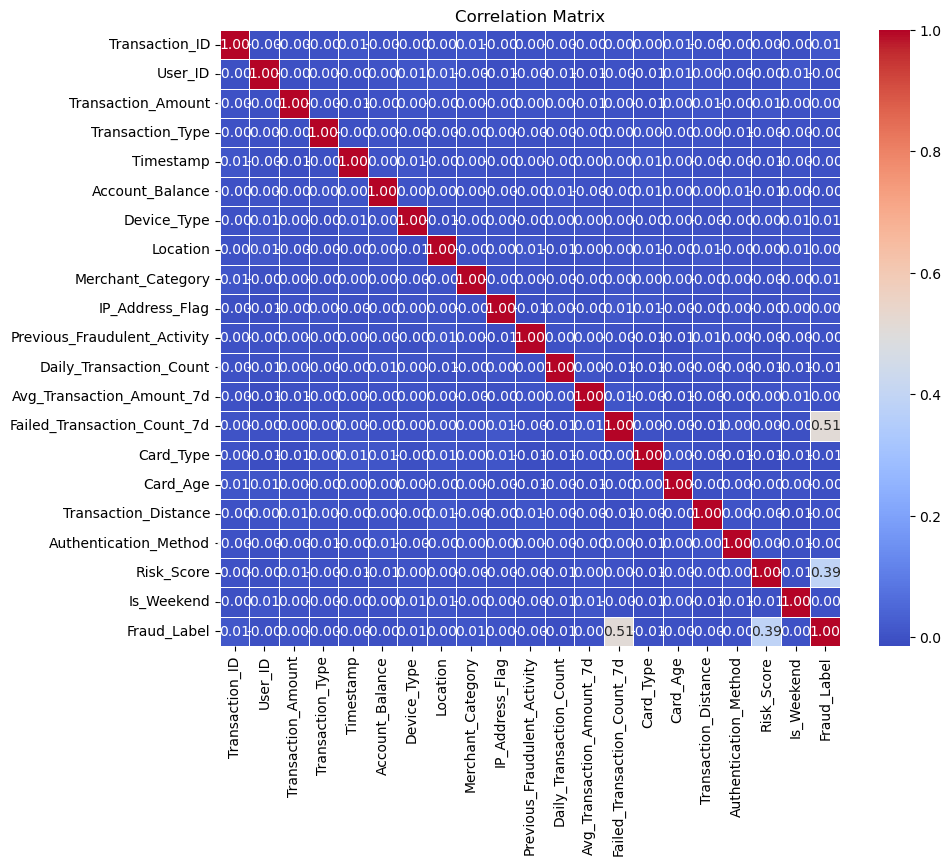

In [19]:
# build correlation matrix
corr_matrix = df.corr()

# visualize and spot correlations
plt.figure(figsize=(10, 8))  # Adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### We can see how 'failed_transaction_count' and 'Risk_Score' are pretty highly correlated with the target var. ###

## High Correlation Variables Removed ##

In [10]:
# drop correlated columns
for df in [x_train, x_test, x_val]:
    df.drop(columns=['Failed_Transaction_Count_7d', 'Risk_Score'], inplace=True)

In [14]:
# re-train and evaluate model
model = processor.make_and_train_tree(x_train, y_train, max_depth=3)
processor.evaluate_model(model, x_test, y_test)

Accuracy score: 0.6718
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      3363
           1       0.17      0.00      0.00      1637

    accuracy                           0.67      5000
   macro avg       0.42      0.50      0.40      5000
weighted avg       0.51      0.67      0.54      5000

